#Multiple Linear Regression

In this Project we will build a model to predict Price of car 
It is divided into two parts: the Exploratory Data Analysis (EDA) section, which provides insights on the data through visualizations such as boxplots, scatter plots, 
histograms, bar graphs; and the Modeling section which uses multiple linear regression to predict car prices based on features like engine size, horsepower and mileage and etc.
The results of this analysis can be used by car manufacturers to determine pricing strategies for new models or existing ones in order to maximize profits. 

The dataset contains information about car prices, Features , deminsion , mpg ,etc.
The data was collected from a variety of sources and includes both numerical 
and categorical variables.
* Car name:- Car Brand
* Fuel Type:- Gas or Diesel 
* Aspiration:- Std or turbo
* doornumber:- Number of door car has(Two or Four)
* Carbody:- The body of a vehicle, or its design
* drivewheel:- Rwd(Rear Wheel Drive) or Fwd(Front Wheel Drive)	
* Engine location :- Where Engine iis located(Front or Back)
* wheelbase:- the distance between the front and rear axles of a vehicle.
* carlength:- Length of Car
* carwidth:- Width of car 
* carheigth:- Height of car 
* curbweight:- the weight of the vehicle including a full tank of fuel and all standard equipment.
* enginetype:- Type of engine(ohc, ohcf, ohcv, dohc, l, rotor, dohcv)
* cylindernumber:- It refers to the number of pistons in the engine, the pistons run up and down inside the cylinders.
*  enginesize:- Size of engine.
* fuelsystem:- Type of fuel System(mpfi, 2bbl, idi , 1bbl, spdi, 4bbl, mfi, spfi)
* boreratio:- the ratio between the dimensions of the engine cylinder bore diameter to its piston stroke-length.
* compressionratio:- it’s the ratio between the maximum and minimum cylinder volume when the piston is at the bottom and top of its stroke respectively.
* horsepower:- Horsepower is a unit of power used to measure the output or performance of engines, motors, and other mechanical devices.
* peakrpm :-Peak RPM, or revolutions per minute, refers to the highest speed at which an engine can rotate
* citympg:- miles per gallon (fuel efficiency) during city driving.
* highwaympg:- miles per gallon (fuel efficiency) during highway driving.
* Price:- Price of Car


[Dataset](https://www.kaggle.com/code/goyalshalini93/car-price-prediction-linear-regression-rfe/data)

In [70]:
import numpy as np   # Numerical Library # Array
import pandas as pd   # Data Analysys  Tabular Analysys
import matplotlib.pyplot as plt   # Data Visua
import seaborn as sns  # Data Visual

In [71]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [72]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [73]:
df.drop('car_ID',axis=1,inplace=True)

In [74]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [75]:
df.shape     # column and row

(205, 25)

In [76]:
df.columns             # column name

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [77]:
df.dtypes             # data types of each column

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [78]:
df.count()                   

symboling           205
CarName             205
fueltype            205
aspiration          205
doornumber          205
carbody             205
drivewheel          205
enginelocation      205
wheelbase           205
carlength           205
carwidth            205
carheight           205
curbweight          205
enginetype          205
cylindernumber      205
enginesize          205
fuelsystem          205
boreratio           205
stroke              205
compressionratio    205
horsepower          205
peakrpm             205
citympg             205
highwaympg          205
price               205
dtype: int64

In [79]:
df.isnull().sum()               # null values are not there 

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [81]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [83]:
# Num and cat columns

num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(include="object").columns

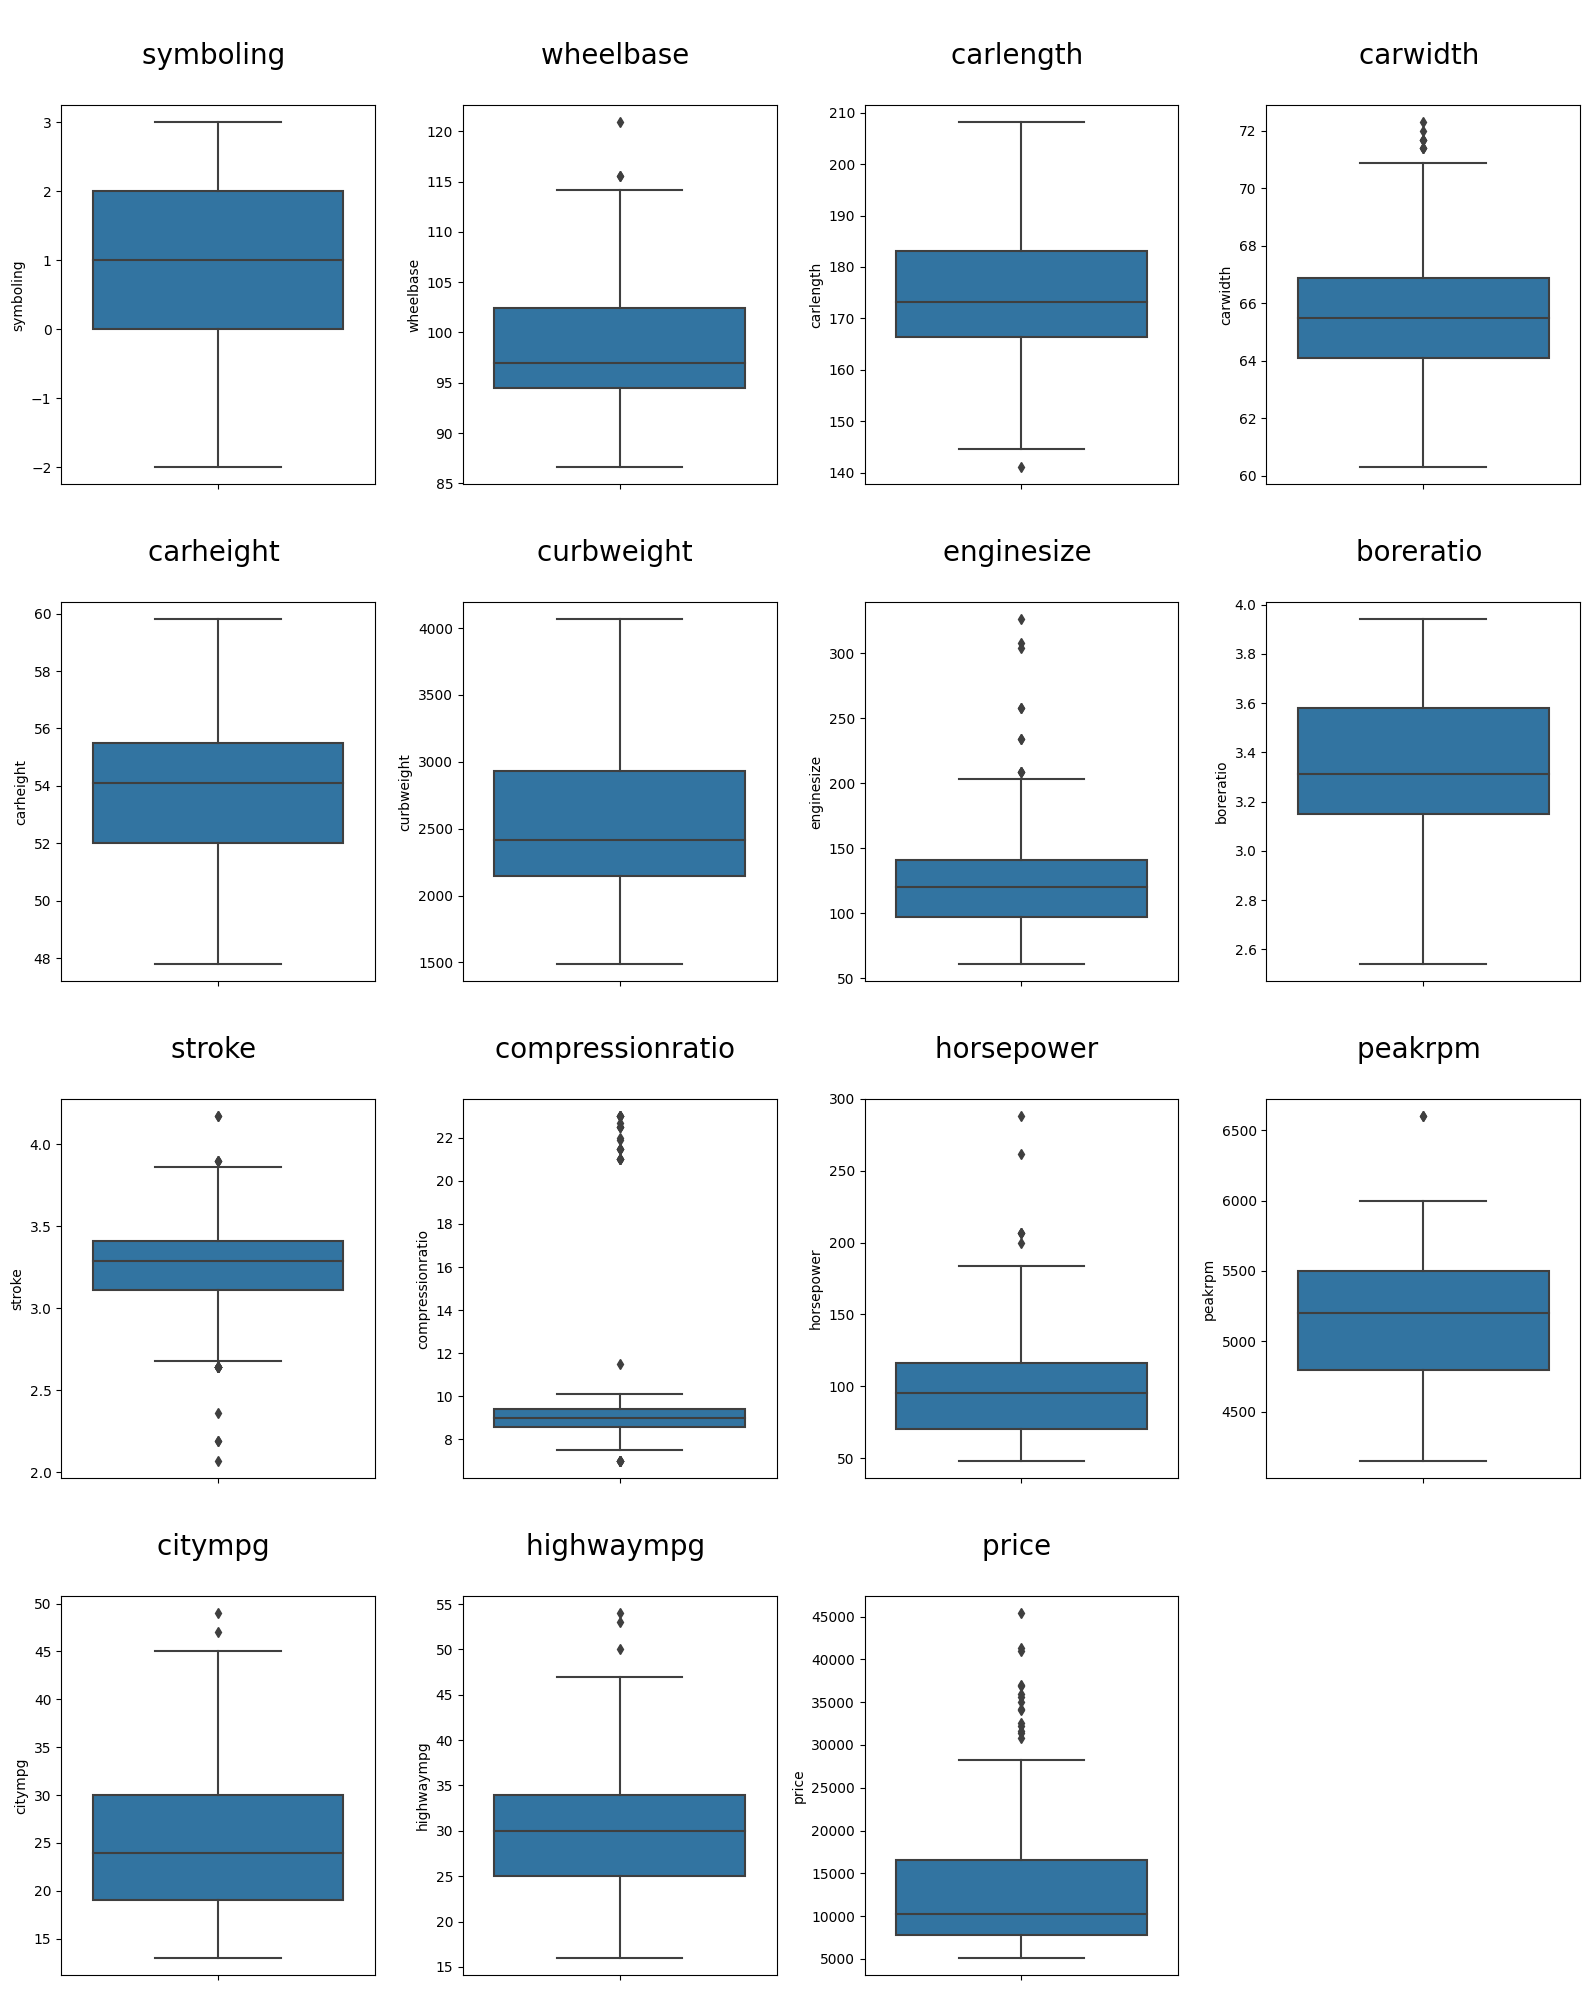

In [84]:
cols = num_cols

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(y = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()



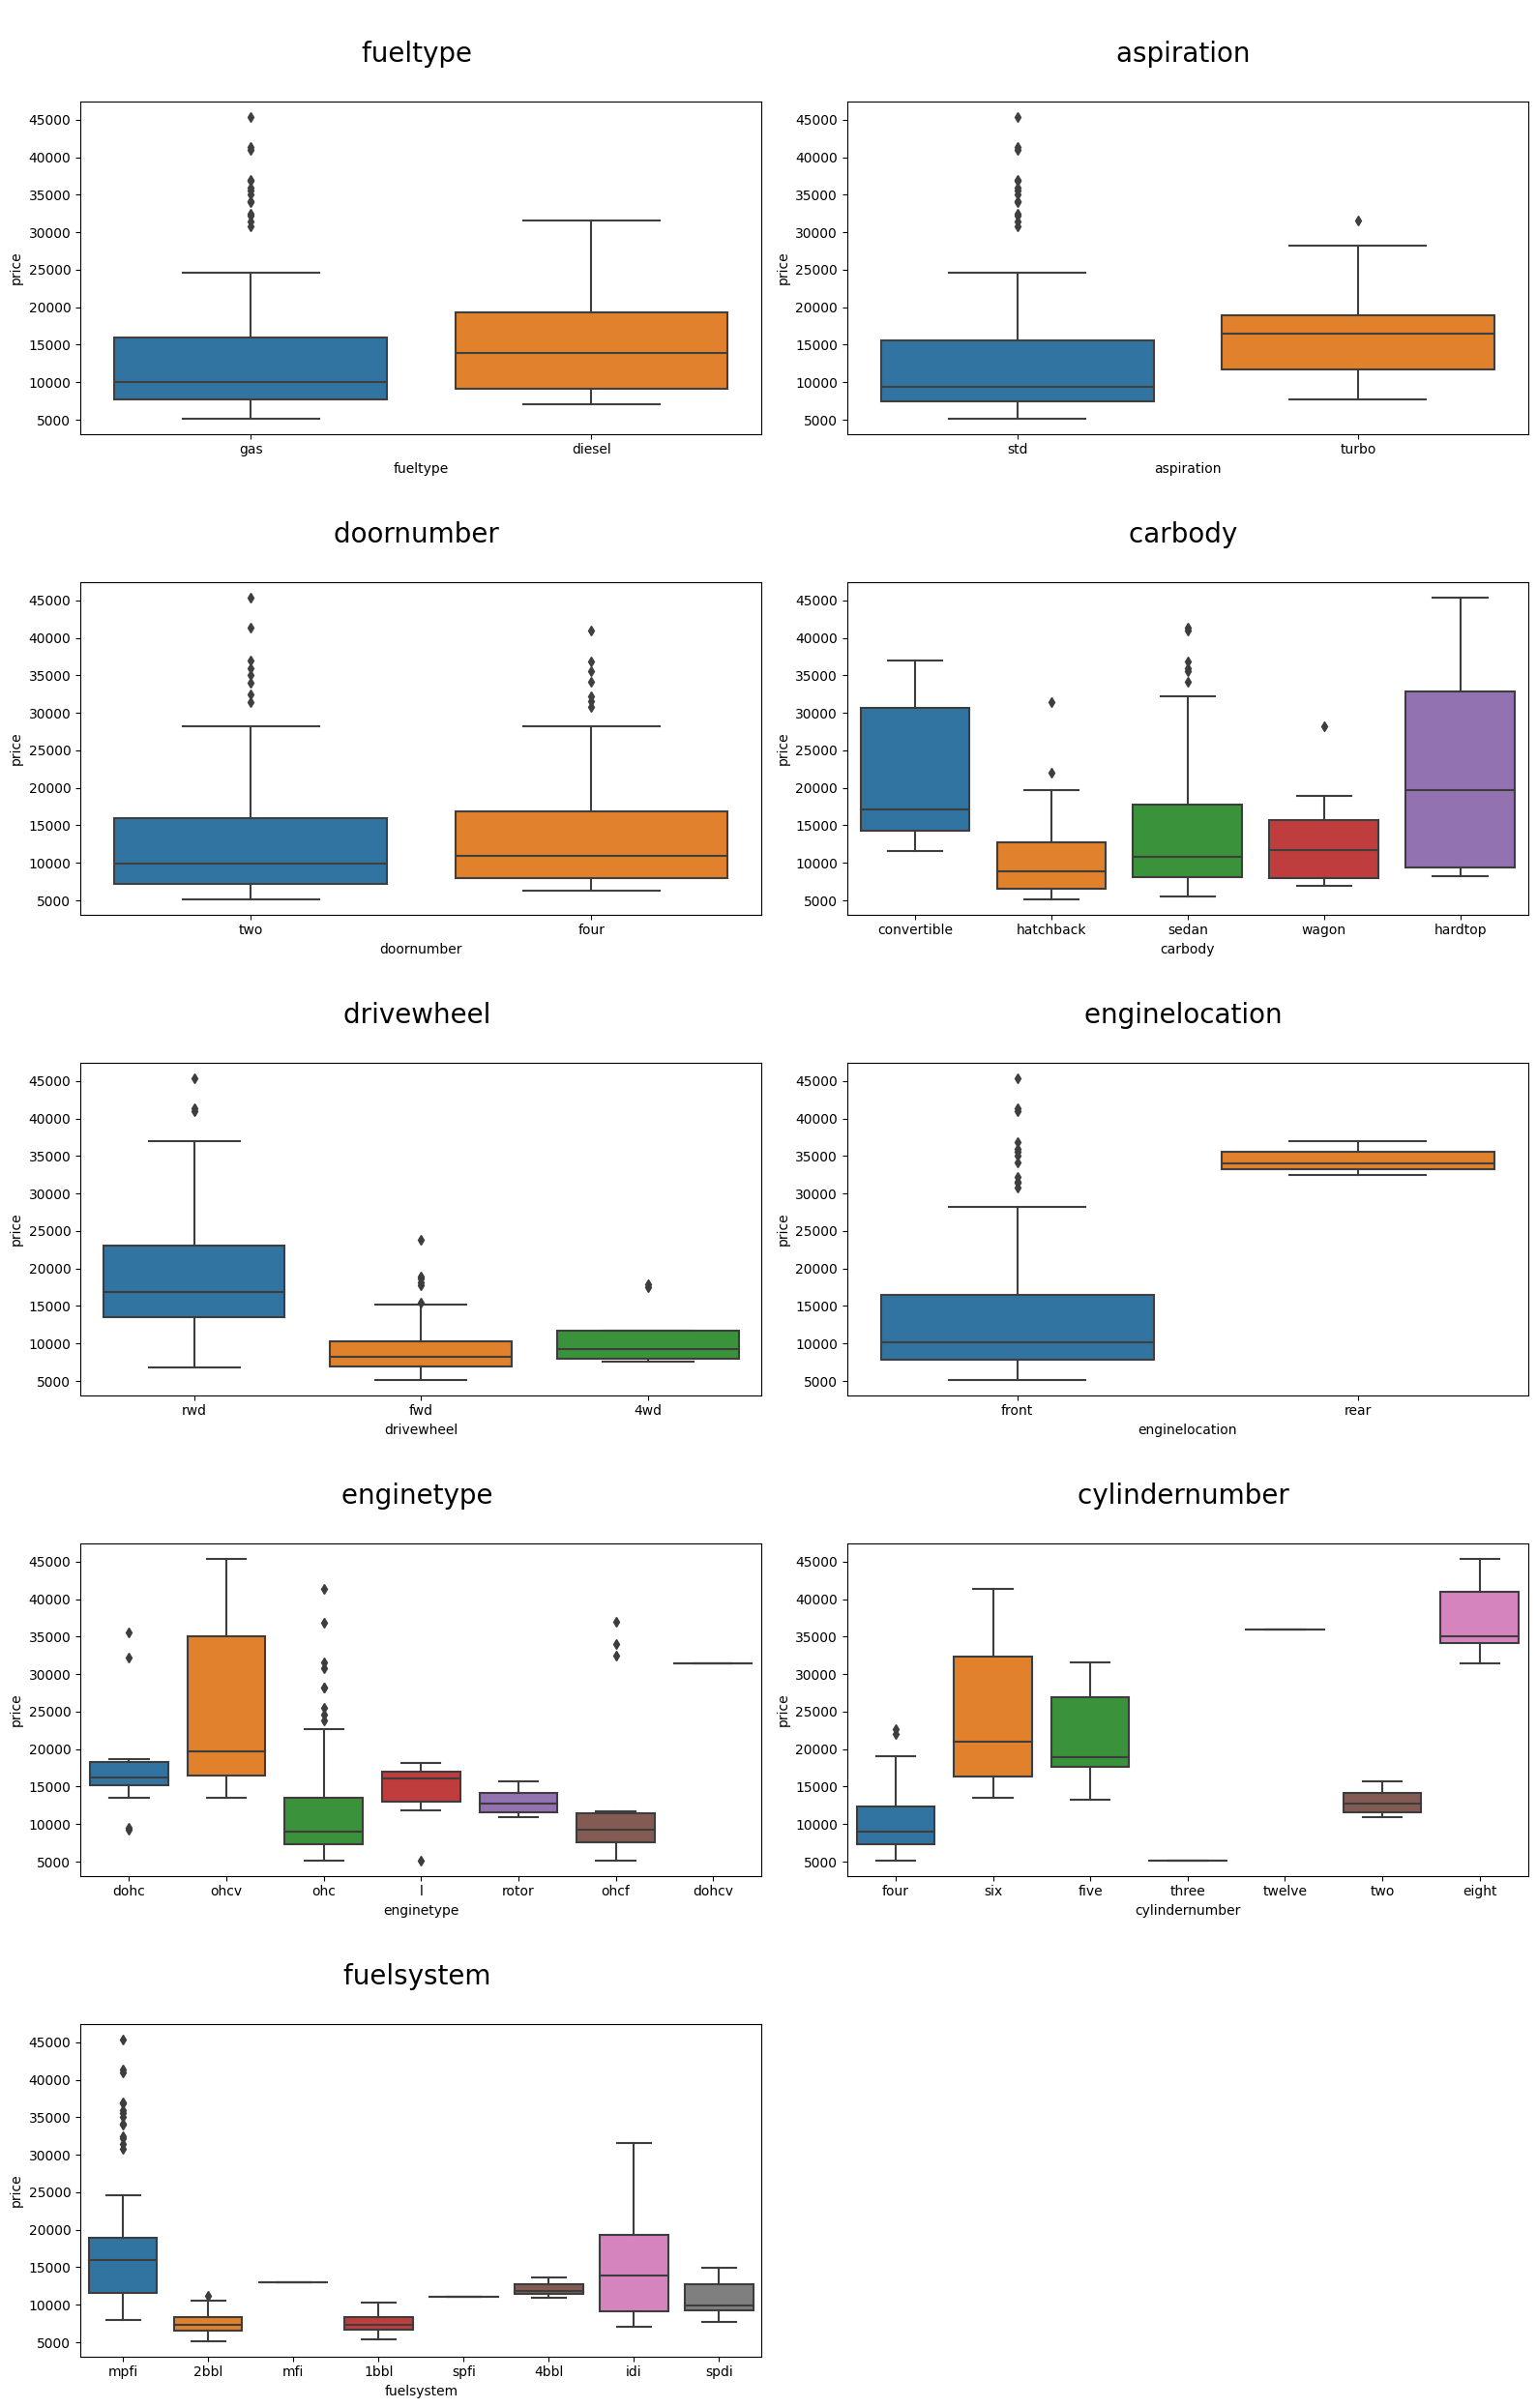

In [85]:
cols = cat_cols

plt.figure(figsize = (16, 25))
plotnumber = 1

for i in range(1, len(cols)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.boxplot(x = cols[i] ,y = df['price'], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [86]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [87]:
#every indepndnt variable should have a linear relation with dependent variable


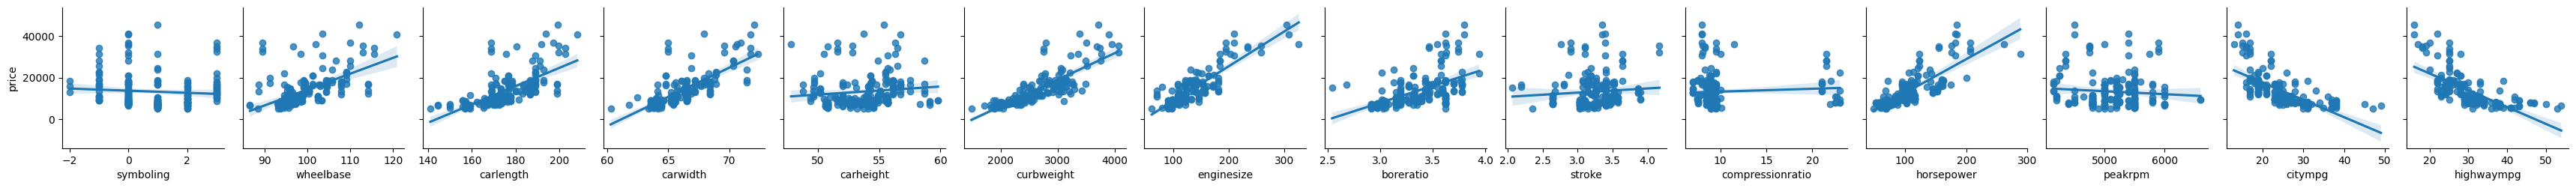

In [88]:
sns.pairplot(df,x_vars=num_cols[0:-1],y_vars="price",kind='reg')
plt.show()                       

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>,
        <Axes: title={'center': 'carwidth'}>],
       [<Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>,
        <Axes: title={'center': 'boreratio'}>],
       [<Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'peakrpm'}>],
       [<Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

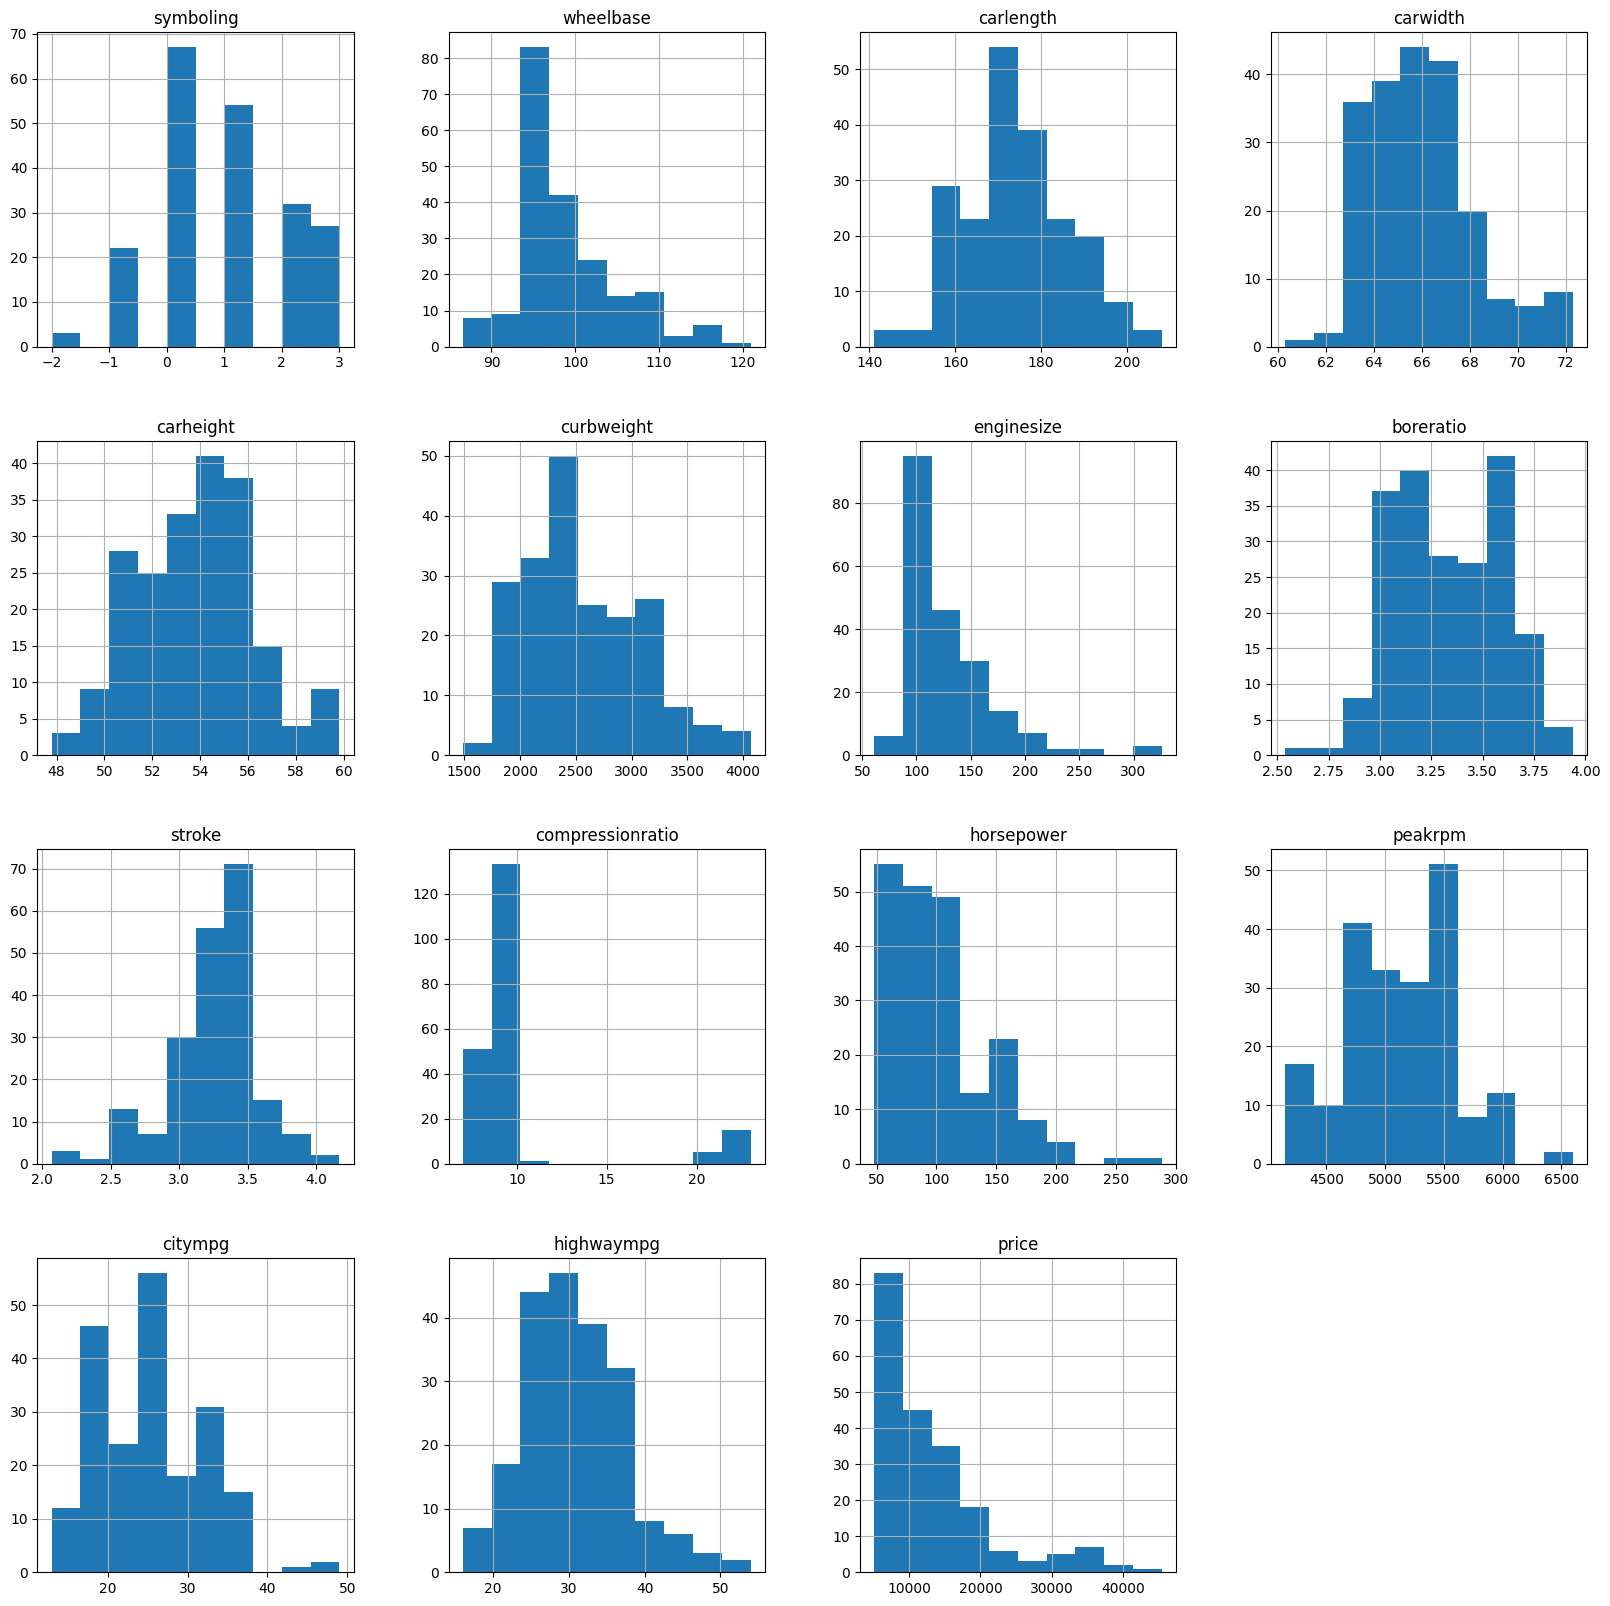

In [89]:
df.hist(figsize=(20,20))

In [90]:
# df.drop('peakrpm',axis=1,inplace=True)
# df.drop('citympg',axis=1,inplace=True)
# df.drop('highwaympg',axis=1,inplace=True)
# df.drop('stroke',axis=1,inplace=True)
df.drop('compressionratio',axis=1,inplace=True)
df.drop('symboling',axis=1,inplace=True)

In [91]:
df.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [92]:
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,mpfi,2.68,3.47,154,5000,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,mpfi,3.19,3.40,102,5500,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,five,136,mpfi,3.19,3.40,115,5500,18,22,17450.0


In [93]:
#Data Cleaning

df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})

df['cylindernumber'] = df['cylindernumber'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

In [94]:
colname=[]
for x in df.columns:
    if df[x].dtype=='object':
        colname.append(x)
colname

  



['CarName',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem']

In [95]:
 #for preprocessing the data 
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    df[x]=le.fit_transform(df[x])


    le_name_mapping= dict(zip(le.classes_,le.transform(le.classes_)))          
    print('Feature',x)
    print('mapping',le_name_mapping)

Feature CarName
mapping {'Nissan versa': 0, 'alfa-romero Quadrifoglio': 1, 'alfa-romero giulia': 2, 'alfa-romero stelvio': 3, 'audi 100 ls': 4, 'audi 100ls': 5, 'audi 4000': 6, 'audi 5000': 7, 'audi 5000s (diesel)': 8, 'audi fox': 9, 'bmw 320i': 10, 'bmw x1': 11, 'bmw x3': 12, 'bmw x4': 13, 'bmw x5': 14, 'bmw z4': 15, 'buick century': 16, 'buick century luxus (sw)': 17, 'buick century special': 18, 'buick electra 225 custom': 19, 'buick opel isuzu deluxe': 20, 'buick regal sport coupe (turbo)': 21, 'buick skyhawk': 22, 'buick skylark': 23, 'chevrolet impala': 24, 'chevrolet monte carlo': 25, 'chevrolet vega 2300': 26, 'dodge challenger se': 27, 'dodge colt (sw)': 28, 'dodge colt hardtop': 29, 'dodge coronet custom': 30, 'dodge coronet custom (sw)': 31, 'dodge d200': 32, 'dodge dart custom': 33, 'dodge monaco (sw)': 34, 'dodge rampage': 35, 'honda accord': 36, 'honda accord cvcc': 37, 'honda accord lx': 38, 'honda civic': 39, 'honda civic (auto)': 40, 'honda civic 1300': 41, 'honda civi

In [96]:
#create X and Y

X = df.drop('price', axis = 1)
Y = df['price']

<ipython-input-97-d3291a6a99aa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y,hist=True)


<Axes: xlabel='price', ylabel='Density'>

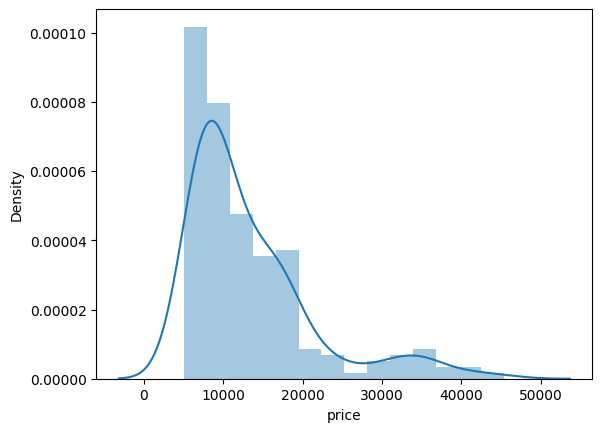

In [97]:
#the dependent variable should follow an approximate norml distrbtn.
sns.distplot(Y,hist=True)

array([[<Axes: title={'center': 'CarName'}>,
        <Axes: title={'center': 'fueltype'}>,
        <Axes: title={'center': 'aspiration'}>,
        <Axes: title={'center': 'doornumber'}>,
        <Axes: title={'center': 'carbody'}>],
       [<Axes: title={'center': 'drivewheel'}>,
        <Axes: title={'center': 'enginelocation'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>,
        <Axes: title={'center': 'carwidth'}>],
       [<Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginetype'}>,
        <Axes: title={'center': 'cylindernumber'}>,
        <Axes: title={'center': 'enginesize'}>],
       [<Axes: title={'center': 'fuelsystem'}>,
        <Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'peakrpm'}>],
       [<Axes: title={'center': 'citympg'}>,
    

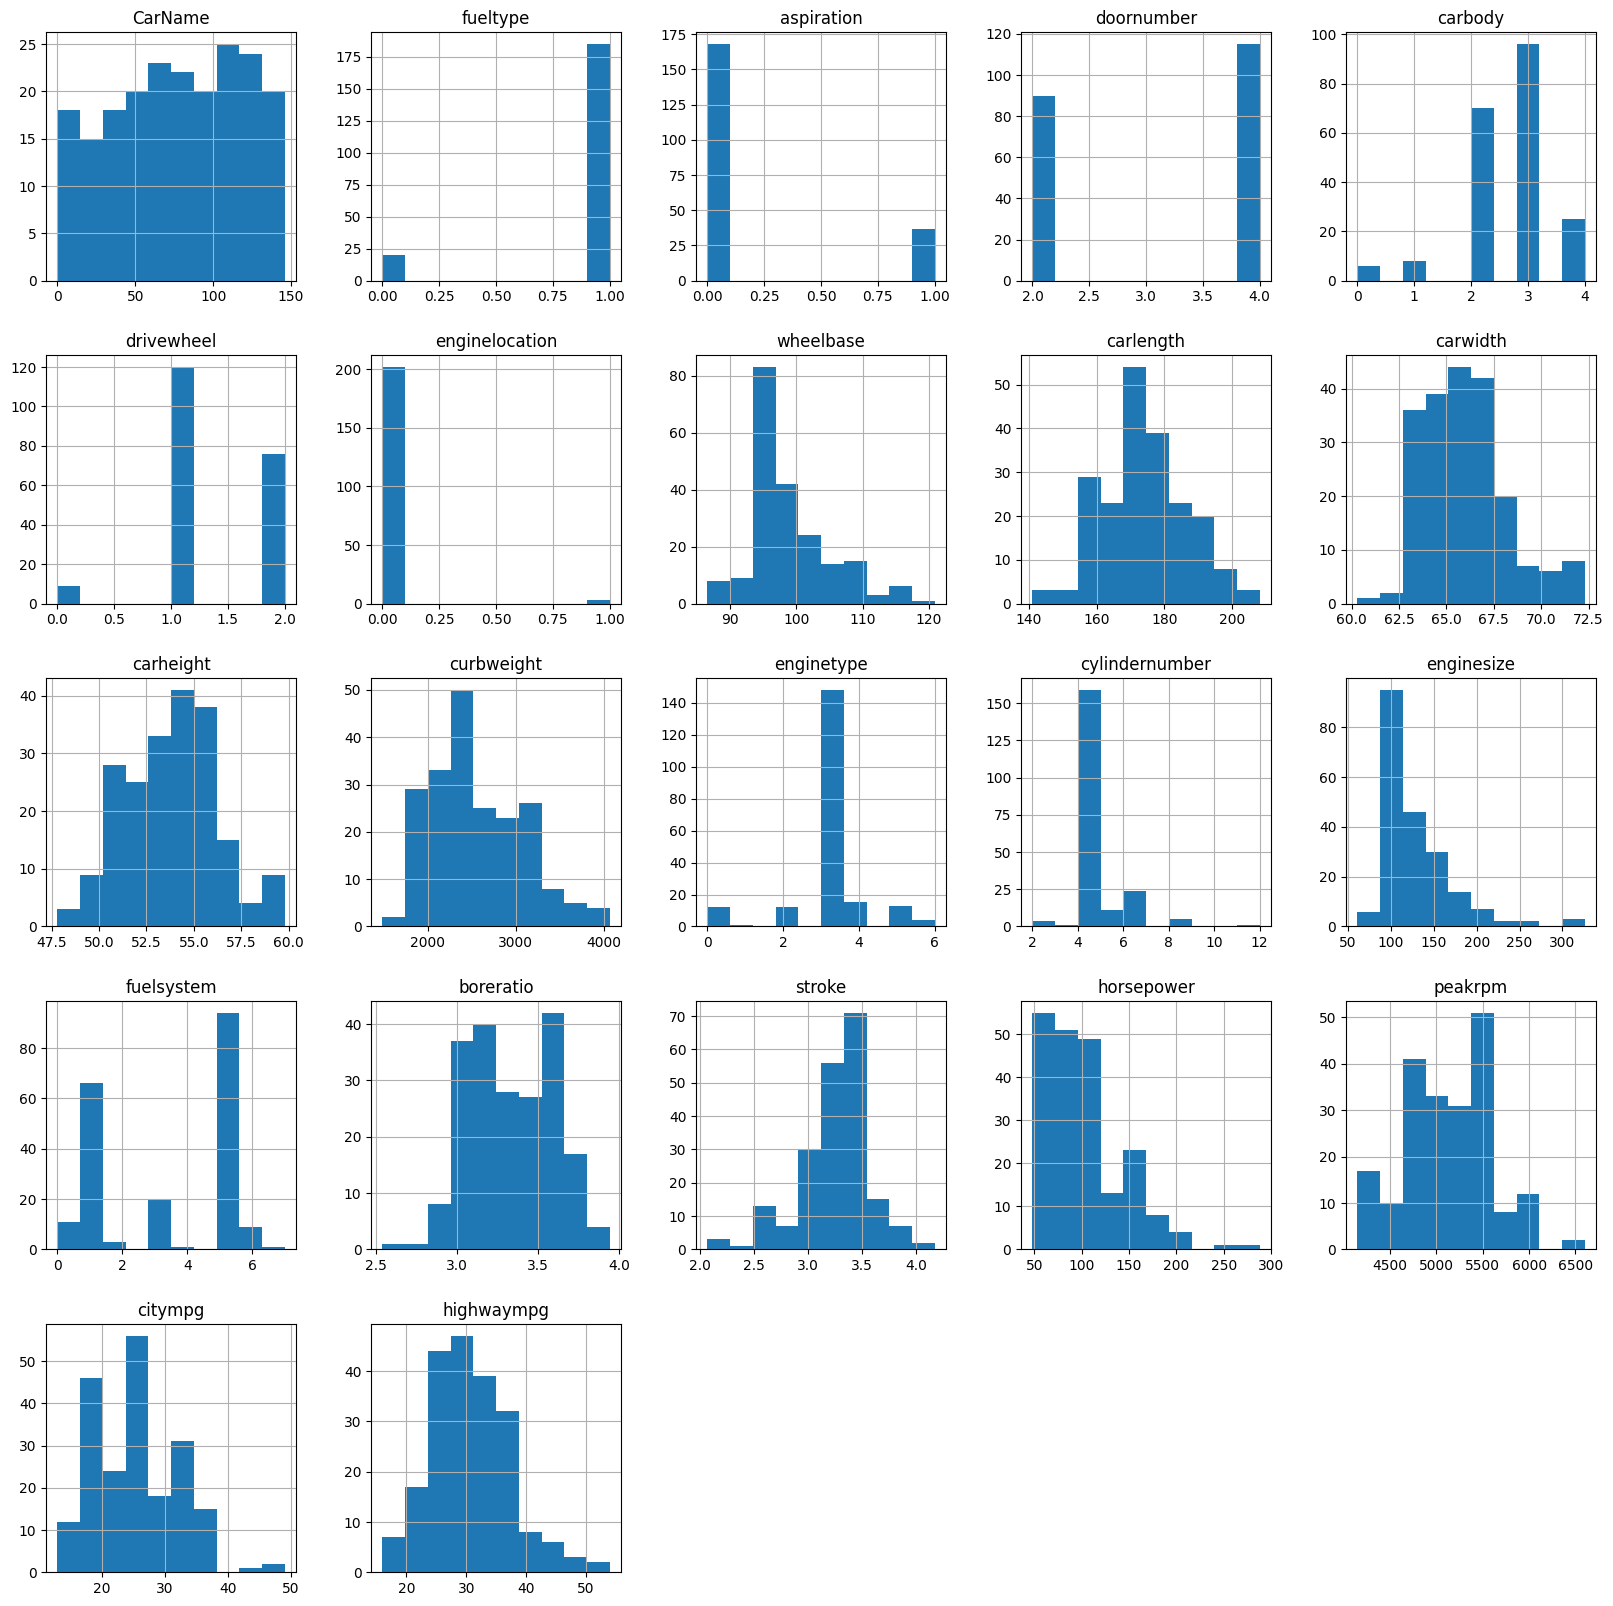

In [98]:
#to check if the data is heavyly skewed (right or left) in x variables.

X.hist(figsize=(20,20))

In [99]:
from scipy.stats import skew
#finding the skeness in each variables
data_num_skew=X.apply(lambda x: skew(x.dropna()))

#subsetting the variables that are highly skewed
data_num_skewed=data_num_skew[(data_num_skew>.75 ) | (data_num_skew<-.75)]

print(data_num_skew)
print(data_num_skewed)

import numpy as np 
#apply log +1 transformtn for all numeric features with skewness over.75
X[data_num_skewed.index]= np.log1p(X[data_num_skewed.index])

CarName          -0.156493
fueltype         -2.712583
aspiration        1.661559
doornumber       -0.245737
carbody          -0.660423
drivewheel       -0.057924
enginelocation    8.083822
wheelbase         1.042514
carlength         0.154810
carwidth          0.897375
carheight         0.062660
curbweight        0.676402
enginetype       -0.531676
cylindernumber    2.796801
enginesize        1.933375
fuelsystem       -0.241213
boreratio         0.020009
stroke           -0.684648
horsepower        1.395006
peakrpm           0.074608
citympg           0.658838
highwaympg        0.536038
dtype: float64
fueltype         -2.712583
aspiration        1.661559
enginelocation    8.083822
wheelbase         1.042514
carwidth          0.897375
cylindernumber    2.796801
enginesize        1.933375
horsepower        1.395006
dtype: float64


In [100]:
data_num_skewed.index

Index(['fueltype', 'aspiration', 'enginelocation', 'wheelbase', 'carwidth',
       'cylindernumber', 'enginesize', 'horsepower'],
      dtype='object')

In [101]:
X

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg
0,2,0.693147,0.000000,2,0,2,0.0,4.495355,168.8,4.175925,...,0,1.609438,4.875197,5,3.47,2.68,4.718499,5000,21,27
1,3,0.693147,0.000000,2,0,2,0.0,4.495355,168.8,4.175925,...,0,1.609438,4.875197,5,3.47,2.68,4.718499,5000,21,27
2,1,0.693147,0.000000,2,2,2,0.0,4.559126,171.2,4.197202,...,5,1.945910,5.030438,5,2.68,3.47,5.043425,5000,19,26
3,4,0.693147,0.000000,4,3,1,0.0,4.613138,176.6,4.207673,...,3,1.609438,4.700480,5,3.19,3.40,4.634729,5500,24,30
4,5,0.693147,0.000000,4,3,0,0.0,4.609162,176.6,4.210645,...,3,1.791759,4.919981,5,3.19,3.40,4.753590,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,139,0.693147,0.000000,4,3,2,0.0,4.701389,188.8,4.247066,...,3,1.609438,4.955827,5,3.78,3.15,4.744932,5400,23,28
201,138,0.693147,0.693147,4,3,2,0.0,4.701389,188.8,4.245634,...,3,1.609438,4.955827,5,3.78,3.15,5.081404,5300,19,25
202,140,0.693147,0.000000,4,3,2,0.0,4.701389,188.8,4.247066,...,5,1.945910,5.159055,5,3.58,2.87,4.905275,5500,18,23
203,142,0.000000,0.693147,4,3,2,0.0,4.701389,188.8,4.247066,...,3,1.945910,4.983607,3,3.01,3.40,4.672829,4800,26,27


                 CarName  fueltype  aspiration  doornumber   carbody  \
CarName         1.000000 -0.069435    0.019914    0.171745  0.099691   
fueltype       -0.069435  1.000000   -0.401397   -0.191491 -0.147853   
aspiration      0.019914 -0.401397    1.000000    0.031792  0.063028   
doornumber      0.171745 -0.191491    0.031792    1.000000  0.680358   
carbody         0.099691 -0.147853    0.063028    0.680358  1.000000   
drivewheel     -0.016129 -0.132257    0.066465   -0.098954 -0.155745   
enginelocation  0.055968  0.040070   -0.057191   -0.137757 -0.277009   
wheelbase       0.024524 -0.306508    0.257091    0.452867  0.408840   
carlength       0.053016 -0.212679    0.234539    0.398568  0.334433   
carwidth       -0.067819 -0.234176    0.302339    0.208807  0.133177   
carheight       0.201900 -0.284631    0.087311    0.552208  0.568534   
curbweight     -0.049407 -0.217275    0.324902    0.197379  0.128467   
enginetype     -0.090381  0.082695   -0.102963   -0.062431 -0.03

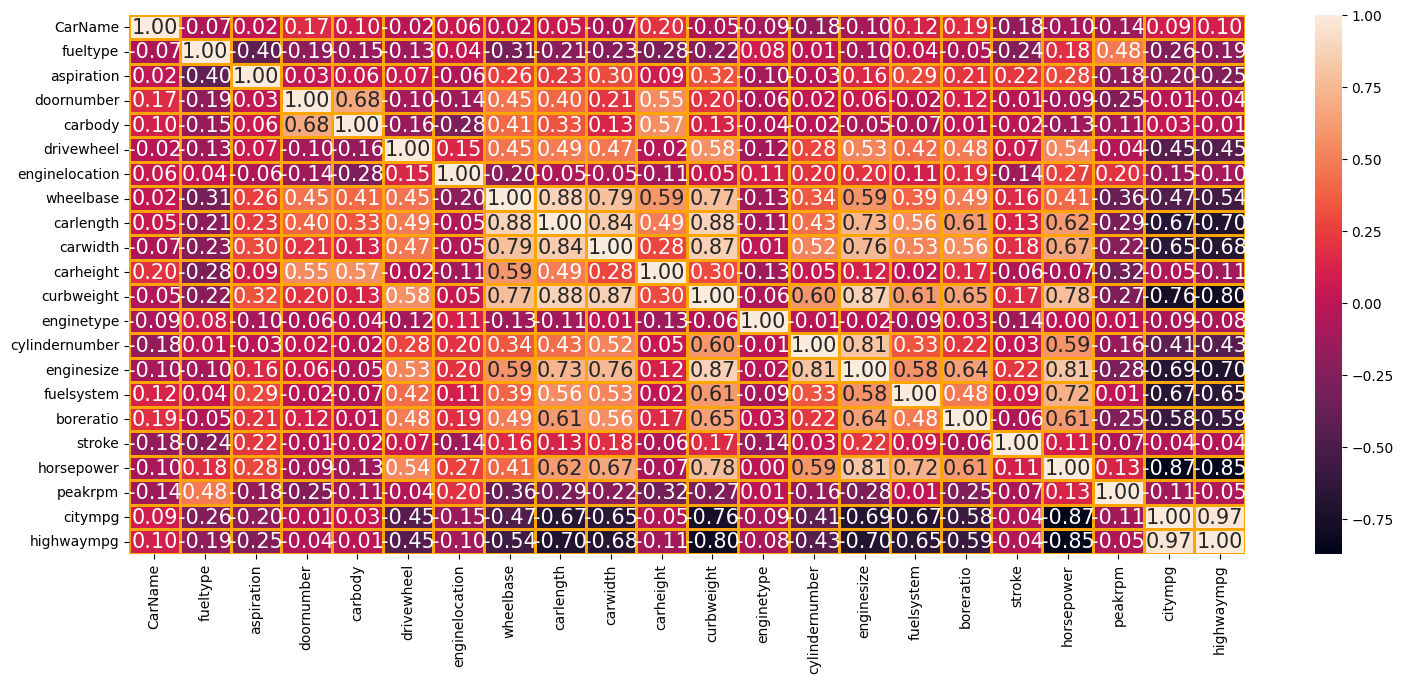

In [102]:
#there should be no multicolinearity between the independent variables
corr_df=X.corr(method='pearson')
print(corr_df)

# sn.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.figure(figsize = (18, 7))
sns.heatmap(corr_df, annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

- Wheelbase of car is increasing than the price is also increasing.
- Car length and car width increasing then price also increases
- Heavy cars has higher price.
- Cars having powerful engine are having high prices.
- Cars with lower mpg are costly.
- Toyoto seems to be the favored car company.

In [107]:
from statsmodels.stats.outliers_influence import  variance_inflation_factor as vif

vif_df= pd.DataFrame()
vif_df['features']=X.columns
vif_df['VIP Factor']= [vif(X.values,i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIP Factor
0,CarName,6.19
1,fueltype,32.04
2,aspiration,2.99
3,doornumber,25.00
4,carbody,26.44
5,drivewheel,16.22
6,enginelocation,1.68
7,wheelbase,50130.31
8,carlength,1811.16
9,carwidth,48142.22


In [104]:
X.drop('cylindernumber',axis=1,inplace=True)


In [106]:
X.drop('citympg',axis=1,inplace=True)


In [108]:
from sklearn.model_selection import train_test_split
#split the data into train and test 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)   #>1000 then test_size=0.3  (700/300)
                                                                                    #<1000 then test_size=0.2  (800/200)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(164, 20)
(41, 20)
(164,)
(41,)


In [109]:
from sklearn.linear_model import LinearRegression
#create a model obj
lm=LinearRegression()
#train the model obj
lm.fit(X_train,Y_train)
#print interceot and coefficient
print(lm.intercept_)         #----- y intercept(b0)  
print(lm.coef_)   

-212422.86456072103
[-3.73799542e+01 -1.88564668e+03 -1.32405383e+03  4.66276918e+02
 -1.19142071e+03  3.95718979e+02  1.42918513e+04  1.52987873e+04
 -1.18337673e+01  1.23026837e+04  2.40448781e+02  6.44232249e+00
  8.07328556e+02  9.79345755e+03  3.34371386e+01 -2.09733072e+03
 -2.56153129e+03  6.94195527e+03  1.60563810e+00  2.39631987e+02]


In [110]:
# pair the feature name with the coefficient
print(list(zip(X.columns,lm.coef_)))

[('CarName', -37.37995421354642), ('fueltype', -1885.6466846199894), ('aspiration', -1324.0538331220225), ('doornumber', 466.27691804235934), ('carbody', -1191.420714621743), ('drivewheel', 395.7189786594424), ('enginelocation', 14291.851344793069), ('wheelbase', 15298.78733208819), ('carlength', -11.833767345769552), ('carwidth', 12302.683709157141), ('carheight', 240.44878148639208), ('curbweight', 6.442322494893426), ('enginetype', 807.3285564392551), ('enginesize', 9793.457545787058), ('fuelsystem', 33.437138594400146), ('boreratio', -2097.330718176535), ('stroke', -2561.531294452332), ('horsepower', 6941.955274912598), ('peakrpm', 1.6056380998700206), ('highwaympg', 239.63198713979472)]


In [111]:
#predict using model
Y_pred_new=lm.predict(X_test)             
Y_pred_new

array([ 9385.48039003, 19703.75581061, 13684.33306619,  8989.38060481,
       37871.35286704, 11842.0138583 ,  8918.74208048, 14091.92023453,
        4190.40846117, 19367.76173413, 15755.95293404,  9614.32925354,
        9672.46985665, 18833.89089524, 29035.44518661, 23968.19567804,
       11544.39482201, 19319.14118251, 15205.36348273, 23949.78019319,
        8988.04542609, 15121.78499187, 13900.71715555, 18338.615429  ,
       21235.24800726, 20096.14858188, 12825.31235055,  8813.65860975,
       11725.49470116, 24240.43268686,  6470.69714077,  3995.37828414,
        6093.45546048, 13112.94367244, 29082.8277241 , 27672.77397226,
       13794.03340231, 24090.87283891, 10262.33419457,  6938.93315045,
        9701.98965882])

In [112]:
lm.score(X_train,Y_train)               

0.8922368398132385

In [113]:
car_new_df=pd.DataFrame()                #compairing actual or predicted sales
car_new_df=X_test

car_new_df['Actual car price']=Y_test
car_new_df['Predicted car price']=Y_pred_new
car_new_df

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginetype,enginesize,fuelsystem,boreratio,stroke,horsepower,peakrpm,highwaympg,Actual car price,Predicted car price
131,100,0.693147,0.000000,2,2,1,0.0,4.575741,176.8,4.213608,...,3,4.890349,5,3.46,3.900,4.510860,5100,31,9895.0,9385.480390
117,88,0.693147,0.693147,4,3,2,0.0,4.691348,186.7,4.238445,...,2,4.905275,5,3.61,3.210,4.962845,5600,24,18150.0,19703.755811
63,58,0.000000,0.000000,4,3,1,0.0,4.603168,177.8,4.212128,...,3,4.812184,3,3.39,3.390,4.174387,4650,42,10795.0,13684.333066
56,54,0.693147,0.000000,2,2,2,0.0,4.567468,169.0,4.200205,...,6,4.262680,2,3.33,3.255,4.624973,6000,23,11845.0,8989.380605
49,50,0.693147,0.000000,2,3,2,0.0,4.634729,191.7,4.271095,...,5,5.789960,5,3.54,2.760,5.572154,5000,17,36000.0,37871.352867
60,57,0.693147,0.000000,4,3,1,0.0,4.603168,177.8,4.212128,...,3,4.812184,1,3.39,3.390,4.442651,4800,32,8495.0,11842.013858
19,25,0.693147,0.000000,2,2,1,0.0,4.559126,155.9,4.168214,...,3,4.510860,1,3.03,3.110,4.262680,5400,43,6295.0,8918.742080
171,115,0.693147,0.000000,2,2,2,0.0,4.599152,176.2,4.198705,...,3,4.990433,5,3.62,3.500,4.762174,4800,30,11549.0,14091.920235
163,118,0.693147,0.000000,2,3,2,0.0,4.559126,168.7,4.174387,...,3,4.595120,1,3.19,3.030,4.262680,4800,34,8058.0,4190.408461
203,142,0.000000,0.693147,4,3,2,0.0,4.701389,188.8,4.247066,...,3,4.983607,3,3.01,3.400,4.672829,4800,27,22470.0,19367.761734


In [114]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)                  
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))      
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)      
print(adjusted_r_squared)

0.7185338389797046
3814.075908694096
0.687939691042716


In [115]:
print(min(Y_test))               
print(max(Y_test))               

5389.0
36000.0
